# Segmentación

## Reposo

Text(0, 0.5, 'Ampllitud (mV)')

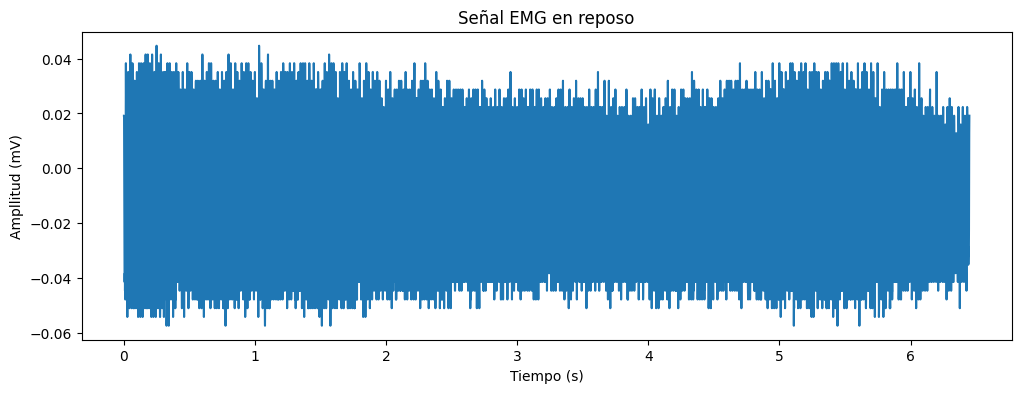

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("EMG_Reposo.txt", delimiter="\t", skip_header=2)
vals1 = data[:, -2]  # Assuming the EMG data is in the last column
vals1=(((vals1/(1024))-0.5)*3.3)/(1009)
vals1=vals1*1000
Fs=1000
time1 = np.arange(0,len(vals1))/Fs
plt.figure(figsize=(12, 4))
plt.plot(time1, vals1)
plt.title("Señal EMG en reposo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ampllitud (mV)")

En el caso del reposo no es necesario hacer una segmentación debido a que toda la señal captada corresponde al ruido

## Tensión

Text(0, 0.5, 'Ampllitud (mV)')

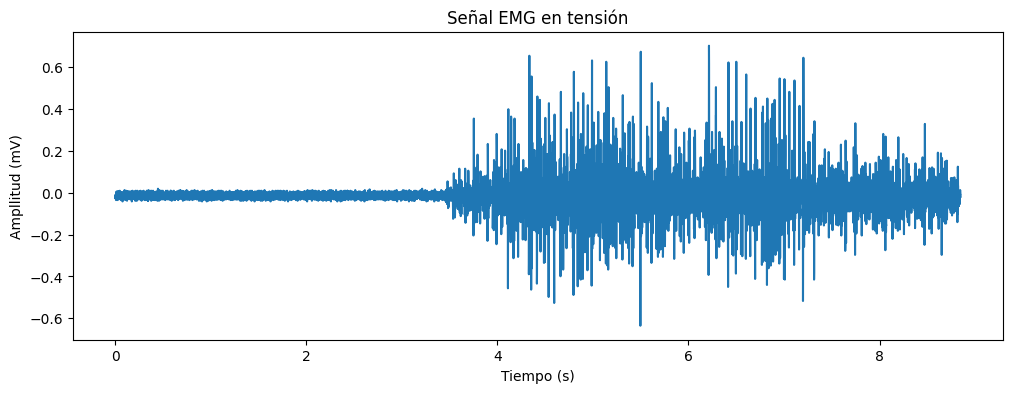

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("EMG_Tension.txt", delimiter="\t", skip_header=2)
vals2 = data[:, -2]  # Assuming the EMG data is in the last column
vals2=(((vals2/(1024))-0.5)*3.3)/(1009)
vals2=vals2*1000
Fs=1000
time2 = np.arange(0,len(vals2))/Fs
plt.figure(figsize=(12, 4))
plt.plot(time2, vals2)
plt.title("Señal EMG en tensión")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ampllitud (mV)")

En este caso, se ve claramente que se parte desde el no movimiento (reposo) y posteriormente comienza el movimiento, por lo que se realizará la segmentación capturando la acción de tensión

Text(0, 0.5, 'Ampllitud (mV)')

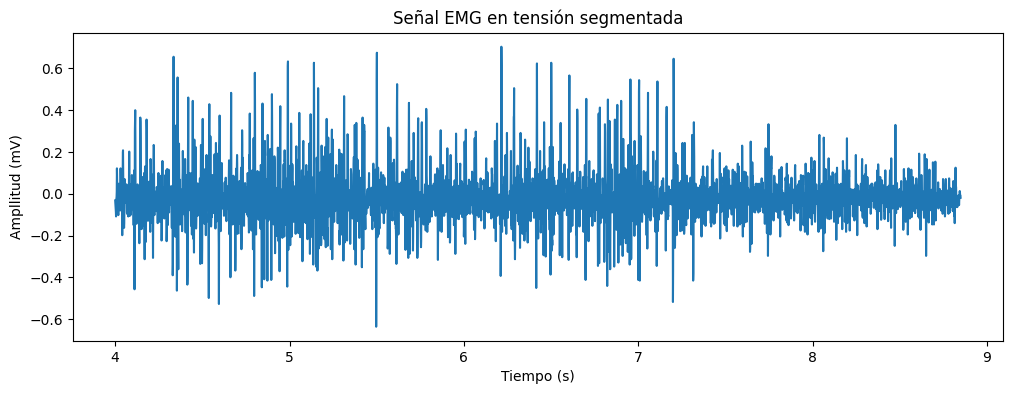

In [7]:
# Definir el tiempo de inicio para segmentar la señal
t_start = 4  
# Encontrar el índice correspondiente al tiempo de inicio
start_index = int(t_start * Fs)
# Segmentar los datos
time_segmented2 = time2[start_index:]
vals_segmented2 = vals2[start_index:]
plt.figure(figsize=(12, 4))
plt.plot(time_segmented2, vals_segmented2)
plt.title("Señal EMG en tensión segmentada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ampllitud (mV)")

## Oposición

Text(0, 0.5, 'Ampllitud (mV)')

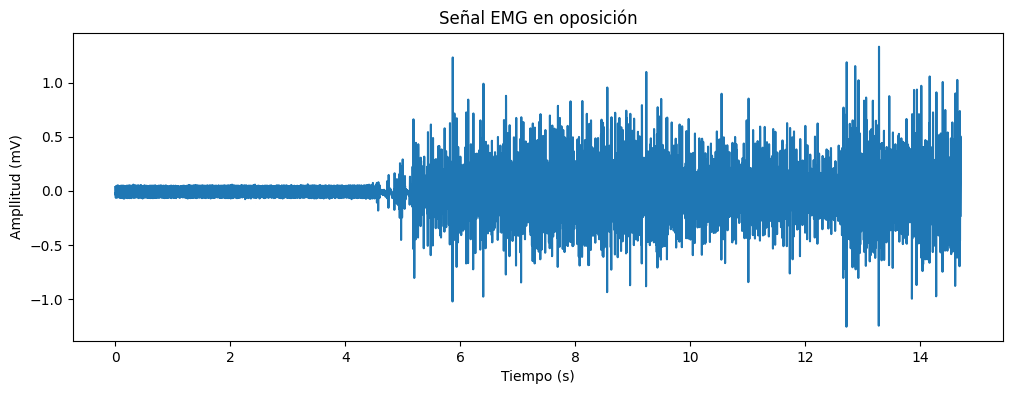

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("EMG_Oposición.txt", delimiter="\t", skip_header=2)
vals3 = data[:, -2]  # Assuming the EMG data is in the last column
vals3=(((vals3/(1024))-0.5)*3.3)/(1009)
vals3=vals3*1000
Fs=1000
time3 = np.arange(0,len(vals3))/Fs
plt.figure(figsize=(12, 4))
plt.plot(time3, vals3)
plt.title("Señal EMG en oposición")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ampllitud (mV)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ampllitud (mV)")

Text(0, 0.5, 'Ampllitud (mV)')

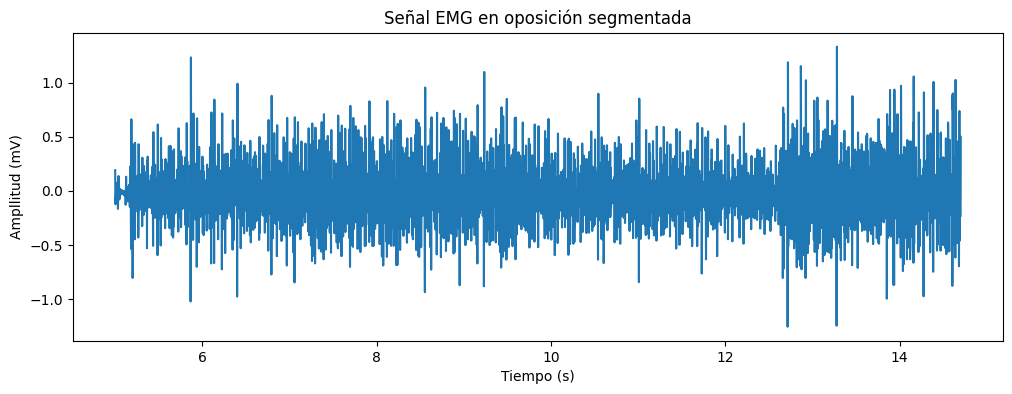

In [11]:
# Definir el tiempo de inicio para segmentar la señal
t_start = 5 
# Encontrar el índice correspondiente al tiempo de inicio
start_index = int(t_start * Fs)
# Segmentar los datos
time_segmented3 = time3[start_index:]
vals_segmented3 = vals3[start_index:]
plt.figure(figsize=(12, 4))
plt.plot(time_segmented3, vals_segmented3)
plt.title("Señal EMG en oposición segmentada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ampllitud (mV)")

# Extracción de características

In [12]:
from numpy import sqrt, average

In [14]:
def zero_crossings(values, threshold):
    crossings = 0
    for i in range(len(values) - 1):
        product = values[i] * values[i + 1]
        if product < 0 and abs(values[i] - values[i + 1]) > threshold:
            crossings += 1
    return crossings
threshold=0
print(threshold)
print(vals_segmented2)
prueba=zero_crossings(vals_segmented2, threshold)
print(prueba)

0
[-0.03193911 -0.04471475 -0.05429649 ... -0.00958173 -0.00958173
 -0.01916347]
1257


### Root Mean Square and Mean Absolute Value


### Tensión

In [15]:
rms_tension=sqrt(sum(vals_segmented2 * vals_segmented2) / len(vals_segmented2))
mav_tension=average(abs(vals_segmented2))
WL_tension = np.sum(np.abs(np.diff(vals_segmented2)))
print("RMS en tensión: ", rms_tension)
print("MAV en tensión: ", mav_tension)
print("Wave Length en tensión: ", WL_tension)
print("Zero crossing en tensión", zero_crossings(vals_segmented2, threshold))

RMS en tensión:  0.12184784359389861
MAV en tensión:  0.08448454486298569
Wave Length en tensión:  370.148739469772
Zero crossing en tensión 1257


### Oposición

In [17]:
rms_oposicion=sqrt(sum(vals_segmented3 * vals_segmented3) / len(vals_segmented3))
mav_oposicion=average(abs(vals_segmented3))
WL_oposicion = np.sum(np.abs(np.diff(vals_segmented3)))
print("RMS en oposición: ", rms_oposicion)
print("MAV en oposición: ", mav_oposicion)
print("Wave Length en oposición: ", WL_oposicion)
print("Zero crossing en tensión", zero_crossings(vals_segmented3, threshold))

RMS en oposición:  0.22778092417192244
MAV en oposición:  0.163243757215984
Wave Length en oposición:  1304.2080262016848
Zero crossing en tensión 2351
